<a href="https://colab.research.google.com/github/jospei/dojo-clean-code/blob/master/classe_inversee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures
import csv

In [5]:
fichier_entree = "sleep75.csv"
fichier_sortie = "sleep_75_sans_salaire.csv"

champs_a_supprimer = [14, 33]

with open(fichier_entree, 'r', newline='') as entree, open(fichier_sortie, 'w', newline='') as sortie:
    lecteur_csv = csv.reader(entree)
    ecrivain_csv = csv.writer(sortie)

    for ligne in lecteur_csv:
        nouvelle_ligne = [champ for i, champ in enumerate(ligne, 1) if i not in champs_a_supprimer]
        ecrivain_csv.writerow(nouvelle_ligne)

print("Champs supprimés avec succès.")

Champs supprimés avec succès.


In [6]:
fichier_entree = "sleep75.csv"
fichier_sortie = "sleep_75_avec_salaire.csv"

with open(fichier_entree, 'r', newline='') as entree, open(fichier_sortie, 'w', newline='') as sortie:
    lecteur_csv = csv.reader(entree)
    ecrivain_csv = csv.writer(sortie)

    for ligne in lecteur_csv:
        if (ligne[13]!="NA" and ligne[32]!="NA"):
          ecrivain_csv.writerow(ligne)

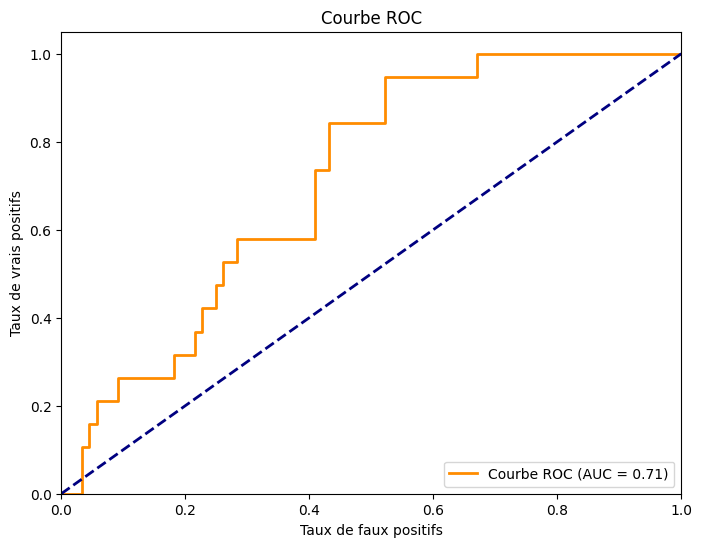

Précision du modèle : 0.822429906542056
Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        88
           1       0.00      0.00      0.00        19

    accuracy                           0.82       107
   macro avg       0.41      0.50      0.45       107
weighted avg       0.68      0.82      0.74       107



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:

data = pd.read_csv("sleep_75_avec_salaire.csv")

X = data[['leis3', 'hrwage', 'totwrk']]
y = data['clerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

# Entraînement du modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédiction des probabilités des classes positives sur l'ensemble de test
y_prob = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Évaluation du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle :", accuracy)
print("Rapport de classification :\n", report)